In [268]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [269]:
print(torch.__version__)

2.0.1+cpu


In [270]:
data=load_breast_cancer()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.float32).reshape(-1, 1)
print(X.shape,y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [271]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=4)
X=X_train
y=y_train
print(X.shape,y.shape)

torch.Size([455, 30]) torch.Size([455, 1])


In [272]:
class CancerClassifier(nn.Module):
    def __init__(self, num_layers=10):
        super().__init__()
        self.hidden = nn.Linear(30, 30)
        self.act = nn.ReLU()
        self.output = nn.Linear(30, 1)
        self.act_output = nn.Sigmoid()
        self.num_layers = num_layers

    def forward(self, x):
        for _ in range(self.num_layers):
            x = self.act(self.hidden(x))
        x = self.act_output(self.output(x))
        return x
    
model = CancerClassifier(3)
print(model)

CancerClassifier(
  (hidden): Linear(in_features=30, out_features=30, bias=True)
  (act): ReLU()
  (output): Linear(in_features=30, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [273]:
model = CancerClassifier()
print(model)

CancerClassifier(
  (hidden): Linear(in_features=30, out_features=30, bias=True)
  (act): ReLU()
  (output): Linear(in_features=30, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [274]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [275]:
x_plt=[i for i in range(1,101)]
y_plt=[]

In [276]:
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss.item()}')
    y_plt.append(loss.item())

Finished epoch 0, latest loss 0.6786196827888489
Finished epoch 1, latest loss 0.48238715529441833
Finished epoch 2, latest loss 0.039198242127895355
Finished epoch 3, latest loss 0.07907944172620773
Finished epoch 4, latest loss 0.044454045593738556
Finished epoch 5, latest loss 0.03472236171364784
Finished epoch 6, latest loss 0.04299702122807503
Finished epoch 7, latest loss 0.04803904891014099
Finished epoch 8, latest loss 0.038424134254455566
Finished epoch 9, latest loss 0.035277873277664185
Finished epoch 10, latest loss 0.03470556065440178
Finished epoch 11, latest loss 0.03458944335579872
Finished epoch 12, latest loss 0.02321498468518257
Finished epoch 13, latest loss 0.03975658863782883
Finished epoch 14, latest loss 0.040116358548402786
Finished epoch 15, latest loss 0.042237620800733566
Finished epoch 16, latest loss 0.03136782720685005
Finished epoch 17, latest loss 0.03376694768667221
Finished epoch 18, latest loss 0.038557760417461395
Finished epoch 19, latest loss 0.03

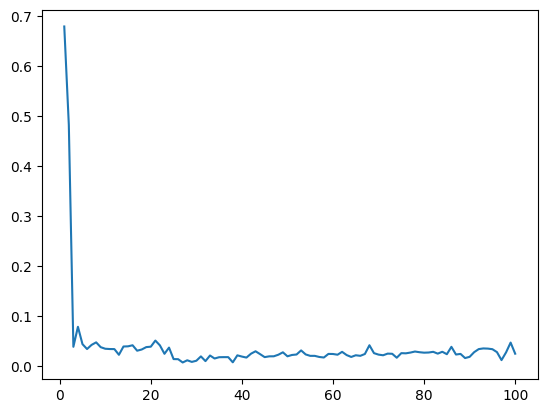

In [277]:
plt.plot(x_plt,y_plt)
plt.show()

In [278]:
# # compute accuracy (no_grad is optional)
# with torch.no_grad():
y_pred = model(X_test)
 
accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.8947368264198303


In [279]:
# a=torch.tensor([0],dtype=torch.float32)
# b=torch.tensor([1],dtype=torch.float32)
# nn.BCELoss()(a,b)